<a href="https://colab.research.google.com/github/04-purnima/Play-Store-App-Review-Analysis/blob/main/Purnima_Rai_user_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
play_store=pd.read_csv('/content/drive/MyDrive/Almabetter Notebooks/Data/PLayStoreAnalysis/Play Store Data.csv')

In [3]:
user_reviews = pd.read_csv('/content/drive/MyDrive/Almabetter Notebooks/Data/PLayStoreAnalysis/User Reviews.csv')

In [4]:
user_reviews.shape

(64295, 5)

In [5]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [6]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
user_reviews.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [8]:
user_reviews.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


In [10]:
user_reviewscopy = user_reviews.copy()

# **DATA CLEANING**

In [11]:
user_reviewscopy.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [12]:
#Dropping all the null values in user_reviewscopy dataset. 
user_reviewscopy.dropna(inplace=True)

In [13]:
user_reviewscopy.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [14]:
user_reviewscopy.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64218,Housing-Real Estate & Property,What nonsensical app.. doesn't owner postings ...,Neutral,0.000000,0.000000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


In [16]:
#Dropping Translated_Reviews Column
user_reviewscopy.drop("Translated_Review", axis=1, inplace=True)

In [17]:
user_reviewscopy.head()

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,1.00,0.533333
1,10 Best Foods for You,Positive,0.25,0.288462
3,10 Best Foods for You,Positive,0.40,0.875000
4,10 Best Foods for You,Positive,1.00,0.300000
5,10 Best Foods for You,Positive,1.00,0.300000


In [18]:
user_reviewscopy['App'].unique()

array(['10 Best Foods for You', '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室',
       '11st', '1800 Contacts - Lens Store',
       '1LINE – One Line with One Touch',
       '2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif',
       '21-Day Meditation Experience',
       '2Date Dating App, Love and matching',
       '2GIS: directory & navigator', '2RedBeans',
       '2ndLine - Second Phone Number',
       '30 Day Fitness Challenge - Workout at Home',
       '365Scores - Live Scores', '3D Live Neon Weed Launcher',
       '4 in a Row', '4K Wallpapers and Ultra HD Backgrounds',
       '591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價房貸查詢', '591房屋交易-香港',
       '7 Cups: Anxiety & Stress Chat', '7 Day Food Journal Challenge',
       '7 Minute Workout', '7 Weeks - Habit & Goal Tracker',
       '8 Ball Pool', '850 Sports News Digest',
       '8fit Workouts & Meal Planner', '95Live -SG#1 Live Streaming App',
       'A Call From Santa Claus!', 'A Word A Day',
       'A&E - Watch Full Episodes of TV Shows',
 

In [23]:
# Renaming the remaining columns
user_reviewscopy.columns = ["App", "Sentiment", "Polarity", "Subjectivity"]

In [24]:
user_reviewscopy['App'].unique().shape

(865,)

In [26]:
user_reviewscopy['Polarity'].unique().shape

(6195,)

In [27]:
user_reviewscopy['Subjectivity'].unique().shape

(4530,)

In [28]:
user_reviewscopy['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [35]:
# Create the Likert Scale
likert = {
  "Negative": -1,
  "Neutral": 0,
  "Positive": 1
}

# Transform the Sentiment column to match the Likert Scale value




In [34]:
# Here, we obtain the mean for each app by grouping the data
user_reviews_mean = user_reviewscopy.groupby("App").mean().copy()
user_reviews_mean

,Sentiment,Polarity,Subjectivity
App,,,
10 Best Foods for You,0.783505,0.470733,0.495455
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.750000,0.392405,0.545516
11st,0.410256,0.185943,0.455340
1800 Contacts - Lens Store,0.725000,0.318145,0.591098
1LINE – One Line with One Touch,0.500000,0.196290,0.557315
...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,0.264706,0.101622,0.545444
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.411765,0.251765,0.393284
Hotstar,0.000000,0.038178,0.493964


In [ ]:
# Count duplicate on a App column
user_reviewscopy.App.duplicated().sum()

24212

In [ ]:
# Count the number of non-duplicates
(~user_reviewscopy.duplicated()).sum()

25077

In [ ]:
# Extract duplicate in App column
user_reviewscopy.loc[user_reviewscopy.App.duplicated(), :]

,App,Sentiment,Polarity,Subjectivity
1,10 Best Foods for You,Positive,0.250000,0.288462
3,10 Best Foods for You,Positive,0.400000,0.875000
4,10 Best Foods for You,Positive,1.000000,0.300000
5,10 Best Foods for You,Positive,1.000000,0.300000
6,10 Best Foods for You,Positive,0.600000,0.900000
...,...,...,...,...
64222,Housing-Real Estate & Property,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,Positive,0.800000,1.000000


In [ ]:
# Dropping Duplicate rows
#user_reviewcopy=user_reviewscopy.App.drop_duplicates(inplace=True)
#user_reviewscopy

,App,Sentiment,Polarity,Subjectivity
0,10 Best Foods for You,Positive,1.000000,0.533333
1,10 Best Foods for You,Positive,0.250000,0.288462
3,10 Best Foods for You,Positive,0.400000,0.875000
4,10 Best Foods for You,Positive,1.000000,0.300000
6,10 Best Foods for You,Positive,0.600000,0.900000
...,...,...,...,...
64222,Housing-Real Estate & Property,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,Positive,0.800000,1.000000


In [39]:
#Combining and refiltering

complete_data = pd.merge(left=play_store, right=user_reviews_mean, on="App").copy()

# Drop duplicates
complete_data.drop_duplicates("App", inplace=True)

# Reset the index since now we have a different number of observations
complete_data = complete_data.reset_index().drop("index", axis=1).copy()

# Select columns that will be used
columns = [0, 1, 2, 3, 5, 6, 8, 9, 13, 14, 15]
complete_data = complete_data.iloc[:,columns].copy()

# Remove the + and the , at the end of each observation of Installs then convert to int
complete_data.Installs = [int(obs.replace("+", "").replace(",", "")) for obs in complete_data.Installs]
complete_data


,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Sentiment,Polarity,Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,Everyone,Art & Design;Pretend Play,0.272727,0.152652,0.641540
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,1000000,Free,Everyone,Art & Design,0.600000,0.268483,0.523447
2,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,5000000,Free,Everyone,Art & Design,1.000000,0.412649,0.679226
3,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,100000,Free,Everyone,Art & Design,0.473684,0.283509,0.479298
4,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,500000,Free,Everyone,Art & Design;Creativity,0.552632,0.171836,0.572762
...,...,...,...,...,...,...,...,...,...,...,...
811,"AD - Nieuws, Sport, Regio & Entertainment",NEWS_AND_MAGAZINES,3.7,10369,1000000,Free,Everyone,News & Magazines,0.526316,0.161824,0.465806
812,AppLock,TOOLS,4.4,4931562,100000000,Free,Everyone,Tools,-0.076923,0.016233,0.499941
813,Diary with lock password,LIFESTYLE,4.3,179139,5000000,Free,Everyone,Lifestyle,0.596154,0.292267,0.509656
814,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,10000000,Free,Teen,Role Playing,0.521739,0.080859,0.505326


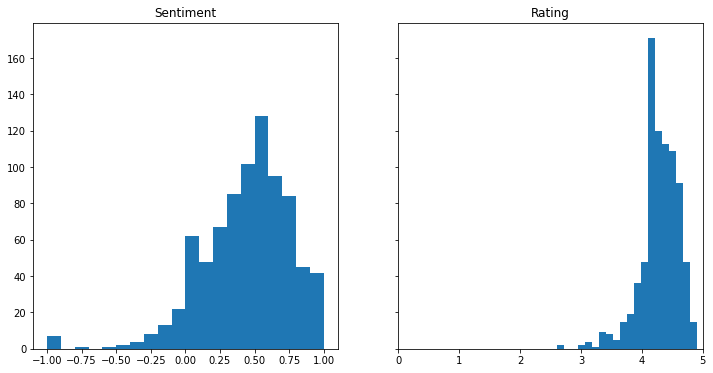

In [40]:
#The sentiment influences the final rating of the app;
# Create the plot for the histograms
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Create the histograms
ax[0].hist(complete_data.Sentiment, bins=20)
ax[1].hist(complete_data.Rating, bins=20)
ax[1].set_xlim(0, 5)

# Add titles
ax[0].set_title("Sentiment")
ax[1].set_title("Rating")

plt.show()

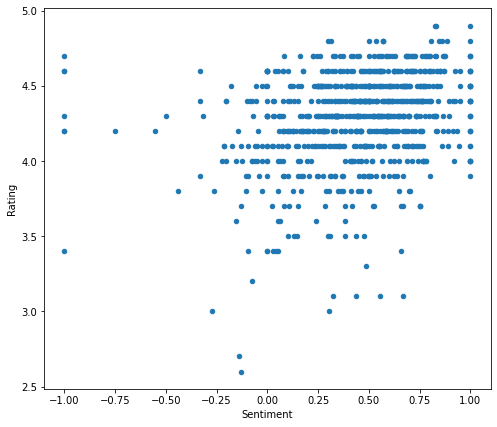

In [41]:
 #calculating the median and plotting the scatter
# Calculate the medians
sentiment_median = np.median(complete_data.Sentiment)
rating_median = np.median(complete_data.Rating)

# Plot the scatter graph
complete_data.plot("Sentiment", "Rating", kind="scatter", figsize=(8, 7))
plt.show()

In [42]:
#Paid content and Rating
# Separate by Type
free = complete_data.loc[complete_data.Type == "Free"].copy()
paid = complete_data.loc[complete_data.Type == "Paid"].copy()

# Obtain the means
free_mean = free.Rating.mean()
paid_mean = paid.Rating.mean()

NameError: ignored

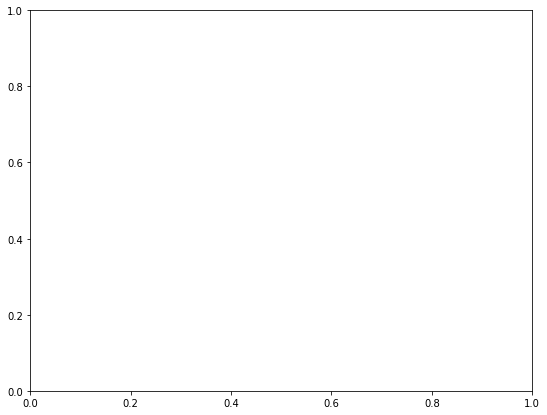

In [53]:
sentiment_by_installs = complete_data.groupby("Category").agg({"Installs": "sum", "Sentiment": "mean"})
sentiment_by_installs = sentiment_by_installs.sort_values(by="Installs").reset_index().copy()

# Create the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 7))

# Create the list of colors for the gradient
Color = list(Color("blue").range_to(Color("cyan"), 100))
sentiments = []
popularity = []
colorMap = []

# Since there are only 32 observations, we need to expand it evenly to have a precise gradient line
for ii in range(0, sentiment_by_installs.Sentiment.count() - 1):
  new_s = np.linspace(sentiment_by_installs.Sentiment[ii], sentiment_by_installs.Sentiment[ii + 1], num=20)
  new_p = np.linspace(sentiment_by_installs.index[ii], sentiment_by_installs.index[ii + 1], num=20)
  for jj in range(0, len(new_s)):
    sentiments.append(new_s[jj])
    popularity.append(new_p[jj])

# Find the min and max values for normalization
max = np.max(sentiments)
min = np.min(sentiments)

# Normalize the y axis
normalized = [(value - min)/(max - min) for value in sentiments]

# Assign a color to each value of y
for value in normalized:
    colorMap.append(colors[np.abs(int((100*value)) - 1)].hex)

# Plot a line between each point with the corresponding color
for kk in range(0, len(sentiments) - 1):
  x = [popularity[kk], popularity[kk+1]]
  y = [sentiments[kk], sentiments[kk+1]]
  ax.plot(x, y, colorMap[kk], linewidth=4, zorder=2)

# Create legends, limits and title
ax.set_ylim(0, 1)
ax.set_title("Sentiment x Popularity of Google Play Store Apps Review", fontsize=14)
ax.set_xlabel("Popularity Ranking", fontsize=14)
ax.set_ylabel("Sentiment", fontsize=14)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


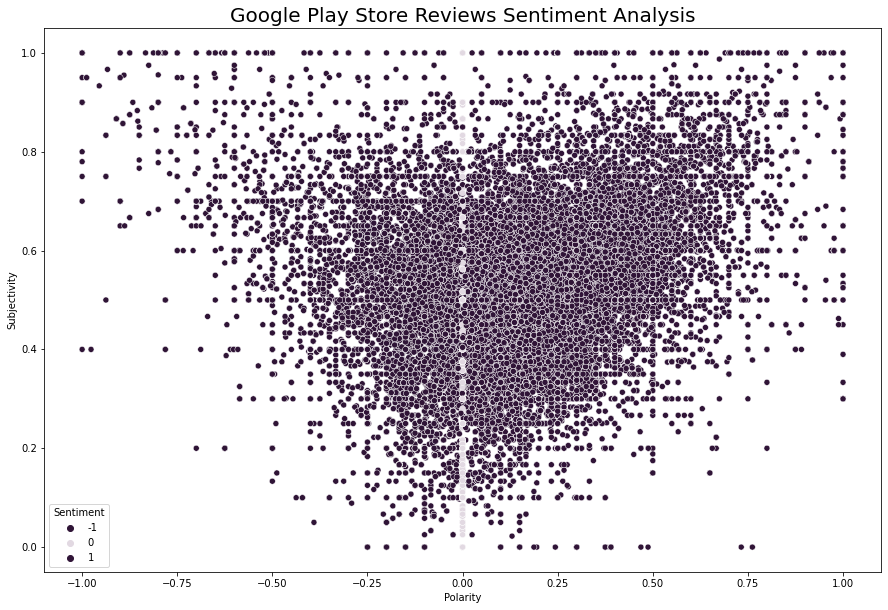

In [50]:
plt.figure(figsize=(15, 10))
sns.scatterplot(user_reviewscopy['Polarity'], user_reviewscopy['Subjectivity'], 
                hue = user_reviewscopy['Sentiment'], edgecolor='white', palette="twilight_shifted_r")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()